# Lognormal Distribution

A variable _x_ has a **log-normal distribution** if _log(x)_ is normally distributed [1]. 

The **probability density function** for the log-normal distribution is:

$p(x) = \frac{1}{\sigma x\sqrt{2\pi}} e^\left(-\frac{(\ln(x) - \mu)^2}{2\sigma^2}\right)$

where $\mu$ is the mean and $\sigma$ is the standard deviation of the normally distributed logarithm of the variable [2]. A log normal distribution results if a random variable is the _product_ of a large number of independent, identically-distributed variables in the same way that a normal distribution results if the variable is the _sum_ of a large number of independent, identically-distributed variables [2].

In [1]:
# import relevant packages
from scipy.stats import lognorm
from scipy import special
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

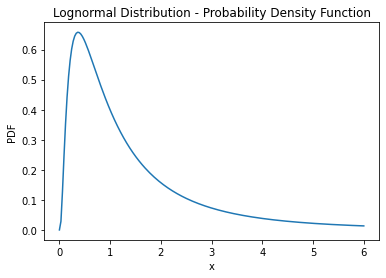

In [2]:
# visualise an example lognormal distribution
mean = 0.0
stddev = 1.0
dist = lognorm([stddev], loc=mean)

# visualise pdf of lognormal distribution
x = np.linspace(0, 6, 200)
pl.xlabel('x')
pl.ylabel('PDF')
pl.title('Lognormal Distribution - Probability Density Function')
pl.plot(x, dist.pdf(x))
pl.show()

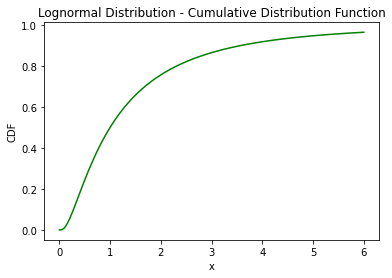

In [3]:
# visualise cdf of lognormal distribution
pl.xlabel('x')
pl.ylabel('CDF')
pl.title('Lognormal Distribution - Cumulative Distribution Function')
pl.plot(x, dist.cdf(x), '-g')
pl.show()

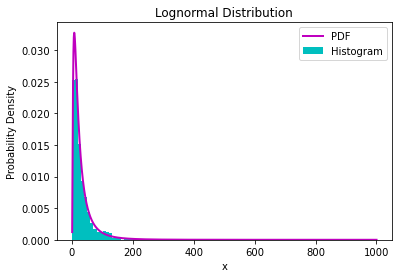

In [4]:
# numpy example [2]
# visualise histogram and pdf of lognormal distribution
# implement pdf from its mathematical equation

# draw samples from the distribution
rng = np.random.default_rng() 
mu, sigma = 3.0, 1.0
s = rng.lognormal(mu, sigma, 1000)

# display histogram of the samples, along with the probability density function
count, bins, ignored = plt.hist(s, 100, density=True, align='mid', color='c', label='Histogram')

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi))) # expression for PDF [1]

plt.plot(x, pdf, linewidth=2, color='m', label='PDF')
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Lognormal Distribution')
plt.legend()
plt.show()

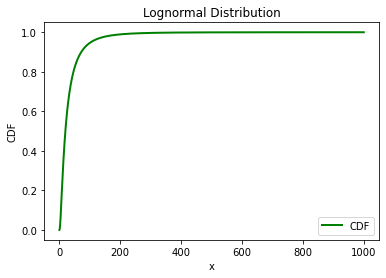

In [5]:
# visualise cdf of lognormal distribution
# implement cdf from its mathematical equation
cdf = 0.5 * (1 + special.erf((np.log(x) - mu) / (sigma * np.sqrt(2)))) # expression for CDF [1]

plt.plot(x, cdf, linewidth=2, color='g', label='CDF')
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Lognormal Distribution')
plt.legend()
plt.show()

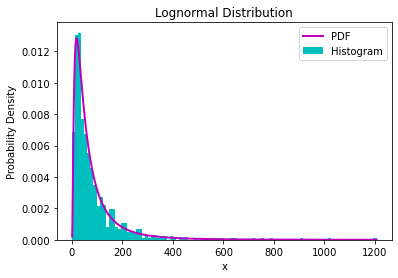

In [6]:
# demonstrate that taking the products of random samples from a uniform distribution 
# can be fit well by a log-normal probability density function.
# generate a thousand samples: each is the product of 100 random
# values, drawn from a normal distribution [2].
rng = rng
b = []
for i in range(1000):
   a = 10. + rng.standard_normal(100)
   b.append(np.prod(a))

b = np.array(b) / np.min(b) # scale values to be positive
count, bins, ignored = plt.hist(b, 100, density=True, align='mid', color='c', label='Histogram')
sigma = np.std(np.log(b))
mu = np.mean(np.log(b))

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='m', label='PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Lognormal Distribution')
plt.legend()
plt.show()

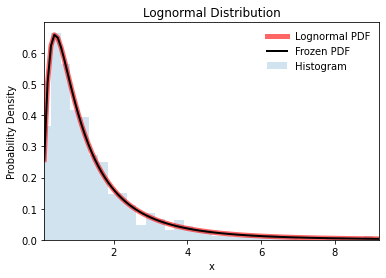

In [7]:
# scipy example [3]
fig, ax = plt.subplots(1, 1)

# calculate the first four moments
s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

# display the probability density function
x = np.linspace(lognorm.ppf(0.01, s), lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s), 'r-', lw=5, alpha=0.6, label='Lognormal PDF')

# alternatively, the distribution object can be called (as a function) to fix the shape, 
# location and scale parameters. this returns a “frozen” RV object holding the given parameters fixed.
# freeze the distribution and display the frozen pdf.
rv = lognorm(s)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='Frozen PDF')

# check accuracy of cdf and ppf
vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))

# generate random numbers
r = lognorm.rvs(s, size=1000)

#compare the histogram
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='Histogram')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Lognormal Distribution')
plt.show()

## References
[1] https://en.wikipedia.org/wiki/Log-normal_distribution  
[2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.lognormal.html   
[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html  